# Wavelength Loss dependence using BraggExact

Here for the N2 configuration from Bird.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


# Initialize

In [2]:
n = 300
# wls = np.linspace(.4e-6, 1.6e-6, n+1)

wlLL = np.linspace(.4e-6, .48e-6, 40)[:-1]
wlL = np.linspace(.48e-6, .84e-6, 35)
wlC = np.linspace(.84e-6, .87e-6, 70)[1:-1]
wlR = np.linspace(.87e-6, 1.6e-6, 40)

wls = np.concatenate([wlLL, wlL, wlC, wlR])

betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [3]:
# n_air = 1.00027717
# n_glass = 1.4388164768221814
# ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
# ts = [15*1e-6, .42*1e-6, 15*1e-6, 15*1e-6]

# 6 tube fiber

In [4]:
ts = [15*1e-6, .42*1e-6, .832*15*1e-6, 10*1e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
mats = ['air', 'glass', 'air', 'glass']
maxhs = [100 ,100, 100, 100]
scale = 15*1e-6

In [5]:
attempt_max = 25
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(len(wls)) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, no_mesh=True, scale=scale)

    k_low = A.ks[0] * A.scale
    if wl <.8e-6:
        guess = np.array(.99995 * k_low)
    else:
        guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0
    attempts = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            if attempts >= attempt_max:
                beta = np.nan
                flag=False
            else:
                guess *= .999999
                reduce += 1
                print("scaling guess: " + str(reduce), flush=True)
                attempts += 1

    betas1[i] = beta
    

     --------------------  1/182: wavelength: 4e-07  --------------------     

Scaled beta:  (235.67222912443899-2.2070417191116014e-07j) . Residual of determinant:  5.3625547879018427e-11 


     --------------------  2/182: wavelength: 4.0205128205128204e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (234.46966836739492-2.5525574574995153e-07j) . Residual of determinant:  4.052909318148126e-11 


     --------------------  3/182: wavelength: 4.041025641025641e-07  --------------------     

Scaled beta:  (233.27931228686714-2.9798064772516374e-07j) . Residual of determinant:  3.041352234584471e-11 


     --------------------  4/182: wavelength: 4.061538461538461e-07  --------------------     

Scaled beta:  (232.1009752245572-3.515302856108613e-07j) . Residual of determinant:  5.9386440150997e-11 


     --------------------  5/182: wavelength: 4.082051282051282e-07  --------------------     

scaling guess: 1
Scaled beta:  (230.93447502520283-4.196

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (198.08286091799906-3.8374300505441627e-07j) . Residual of determinant:  1.143537870213474e-11 


     --------------------  39/182: wavelength: 4.779487179487179e-07  --------------------     

scaling guess: 1
Scaled beta:  (197.23257999332228-3.6216598951115736e-07j) . Residual of determinant:  6.569213520944497e-11 


     --------------------  40/182: wavelength: 4.8e-07  --------------------     

scaling guess: 1
Scaled beta:  (196.38956697741733-3.4330575883625555e-07j) . Residual of determinant:  6.687776108594356e-11 


     --------------------  41/182: wavelength: 4.905882352941176e-07  --------------------     

Scaled beta:  (192.15024649209087-2.7597228603541067e-07j) . Residual of determinant:  4.661288434801363e-12 


     --------------------  42/182: wavelength: 5.011764705882352e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (188.0900512315202-2.3890190

Scaled beta:  (112.14122142767471-0.00010815257308814102j) . Residual of determinant:  1.3012865668538218e-13 


     --------------------  76/182: wavelength: 8.408695652173913e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (112.08313000275801-0.00011125996227759452j) . Residual of determinant:  4.743611149901636e-14 


     --------------------  77/182: wavelength: 8.41304347826087e-07  --------------------     

scaling guess: 1
Scaled beta:  (112.02509700676994-0.00011447362296575453j) . Residual of determinant:  5.787143211970813e-14 


     --------------------  78/182: wavelength: 8.417391304347826e-07  --------------------     

Scaled beta:  (111.96712231475298-0.0001177972570333977j) . Residual of determinant:  1.1807682531126543e-13 


     --------------------  79/182: wavelength: 8.421739130434783e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta

scaling guess: 1
Scaled beta:  (110.34031388309667-0.00020204985773726404j) . Residual of determinant:  2.3716270148645186e-13 


     --------------------  108/182: wavelength: 8.547826086956522e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.28325672761709-0.00020679663810337955j) . Residual of determinant:  1.8160026614276095e-13 


     --------------------  109/182: wavelength: 8.552173913043478e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.22625729408334-0.00021162990435512018j) . Residual of determinant:  4.024155154497406e-14 


     --------------------  110/182: wavelength: 8.556521739130435e-07  --------------------     

scaling guess: 1
Scaled beta:  (110.16931469159377-0.0002165624912345593j) . Residual of determinant:  3.09502474098323e-14 


     --------------------  111/182: wavelength: 8.560869565217391e-07  --------------------     

Scaled beta:  (110.11242808217659-0.0002216091920656622j) . Residual of determinant:  1.7354

scaling guess: 1
scaling guess: 2
Scaled beta:  (108.57058635724867-0.0001172971804928076j) . Residual of determinant:  2.9477729209301277e-13 


     --------------------  140/182: wavelength: 8.686956521739131e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (108.51572395557953-0.00011745541773123116j) . Residual of determinant:  4.495219662394757e-14 


     --------------------  141/182: wavelength: 8.691304347826087e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (108.4609382674376-0.00011747632706217782j) . Residual of determinant:  1.4680879786154205e-13 


     --------------------  142/182: wavelength: 8.695652173913044e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
Scaled beta:  (108.40622788967349-0.00011736849

In [6]:
# Formula for loss spikes from article

ms1 = np.arange(1,3,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d1 = ts[1]

ls1 = (2 * n1 * d1 / ms1 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver


<IPython.core.display.Javascript object>


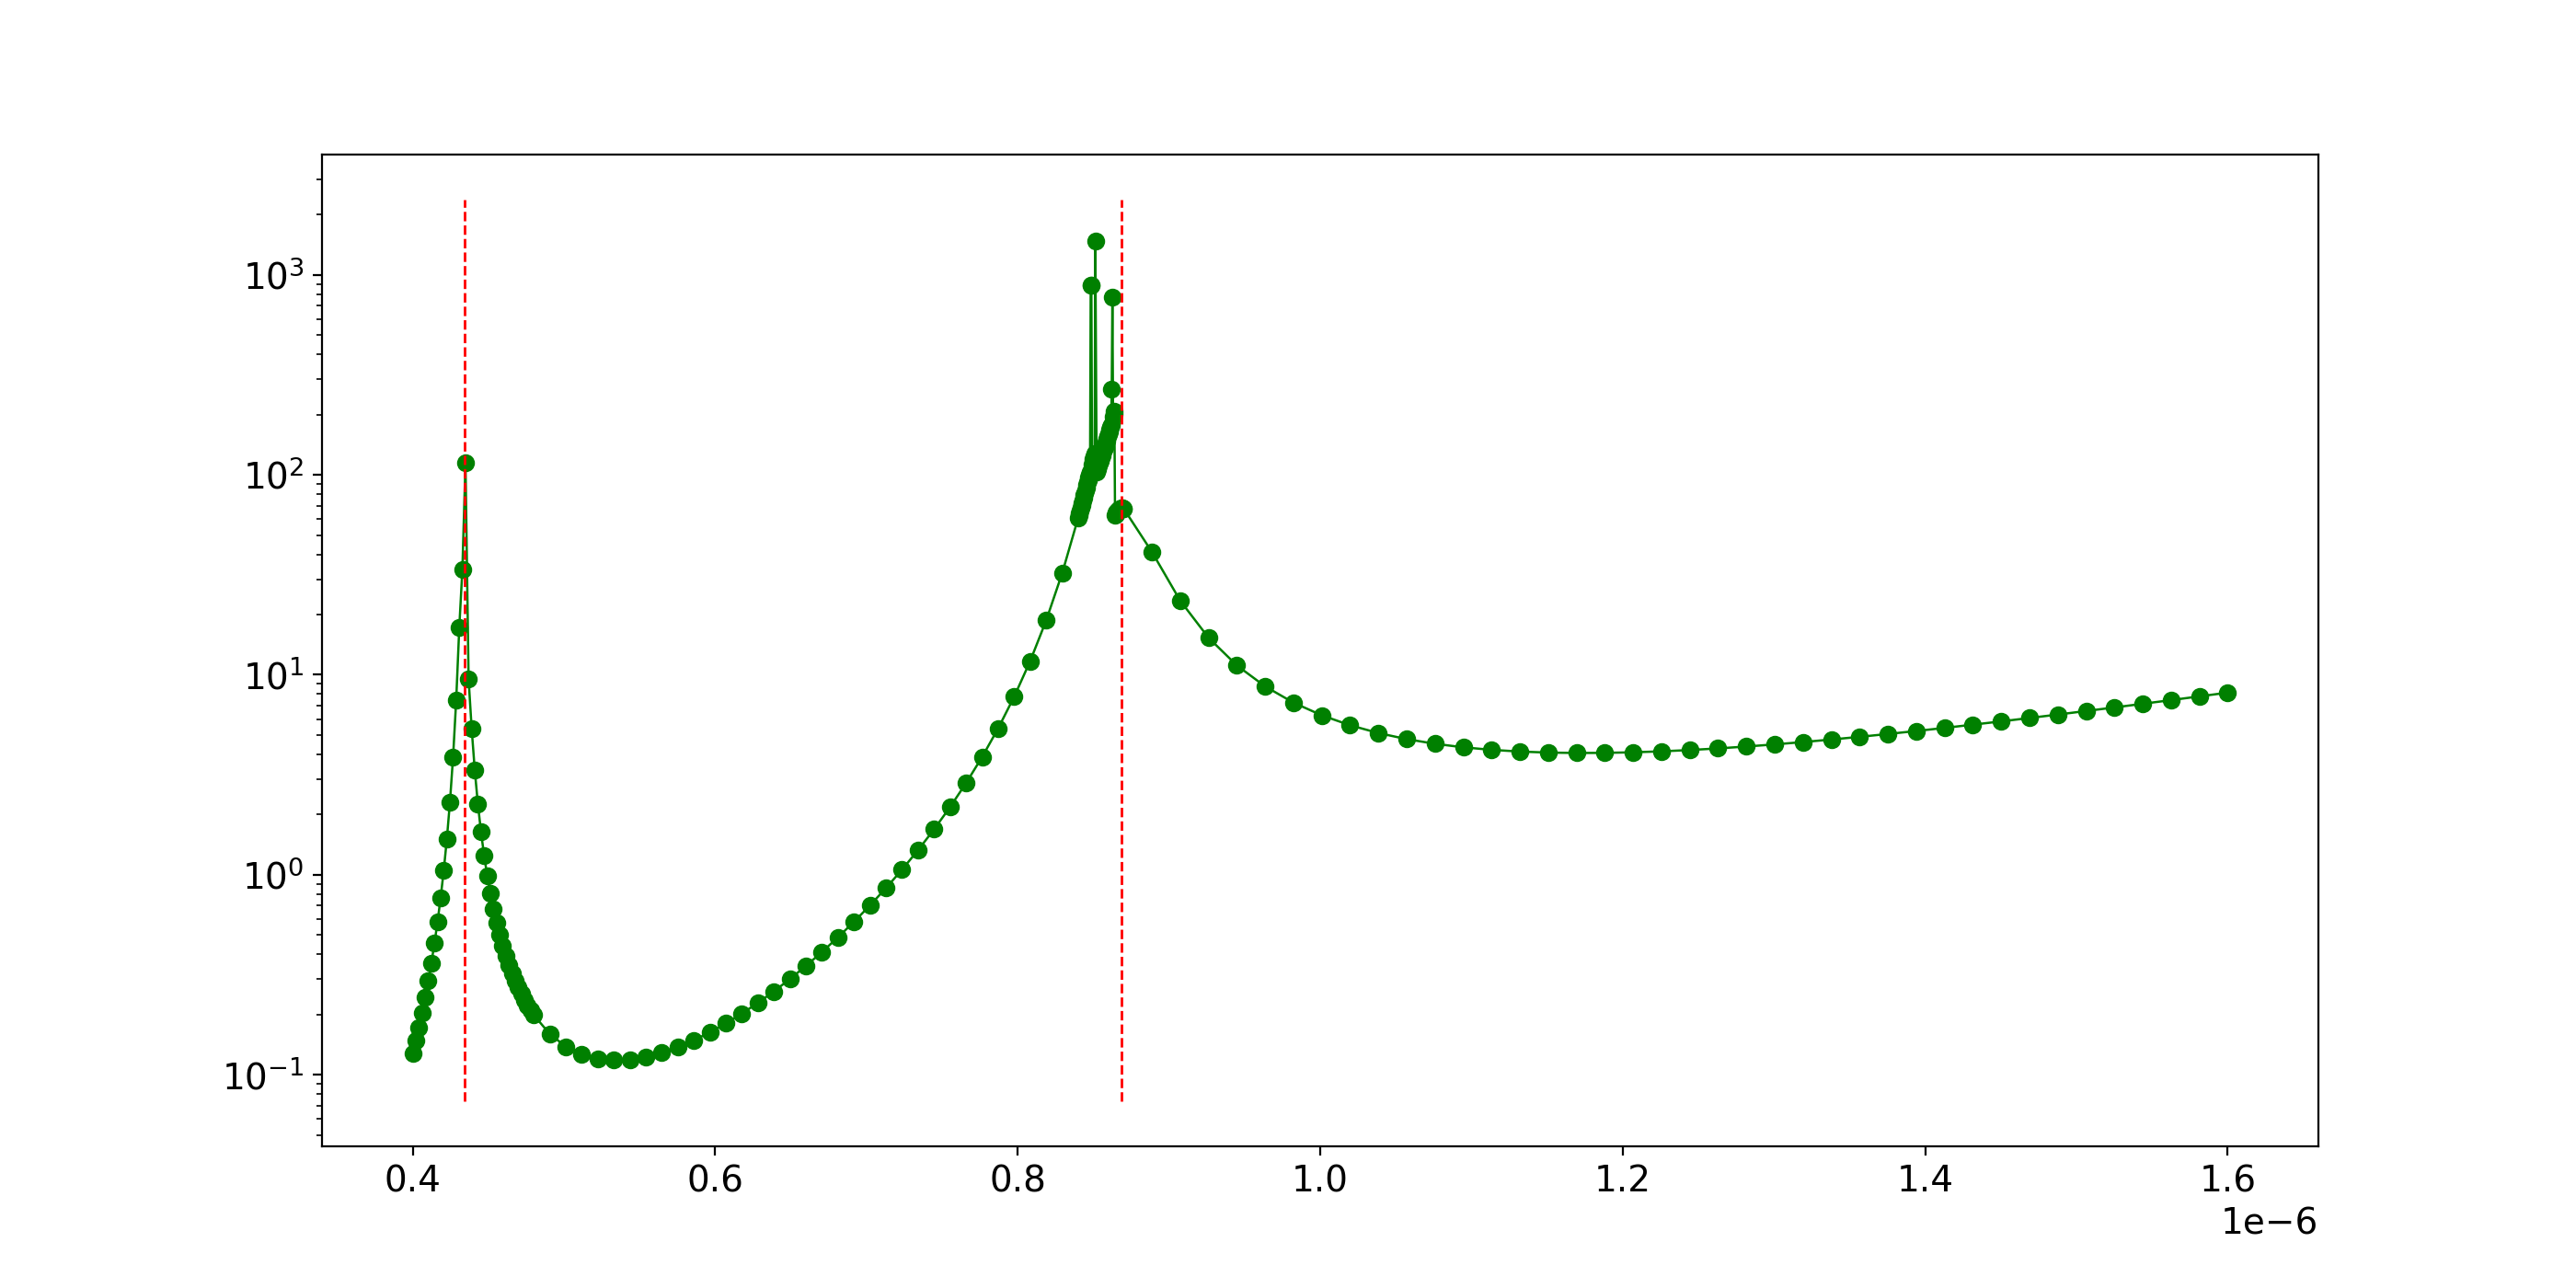

In [11]:
%matplotlib notebook
plt.figure(figsize=(14,7))

CL = -20 * betas1.imag/A.scale / np.log(10)
msk = np.where(CL>0)
plt.plot(wls[msk], CL[msk], color='green', marker='o',linewidth=.9)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')


Save data for pgfplots

In [12]:
import os
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/bragg/6tube'))

both = np.column_stack((wls[msk]*1e6, CL[msk]))
np.savetxt(paper_path + '/analytic.dat', both, fmt='%.8f')

# 8 tube fiber


In [3]:
n = 300
wls = np.linspace(2.4e-6, 13.6e-6, n+1)

# wlLL = np.linspace(.4e-6, .48e-6, 40)[:-1]
# wlL = np.linspace(.48e-6, .84e-6, 35)
# wlC = np.linspace(.84e-6, .87e-6, 70)[1:-1]
# wlR = np.linspace(.87e-6, 1.6e-6, 40)

# wls = np.concatenate([wlLL, wlL, wlC, wlR])

betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [14]:
ts = [59.5*1e-6, 6*1e-6, .832*59.5*1e-6, 10*1e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
mats = ['air', 'glass', 'air', 'glass']
maxhs = [100 ,100, 100, 100]

In [15]:
attempt_max = 25
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(len(wls)) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=wl, no_mesh=True)

    k_low = A.ks[0] * A.scale
    if wl <.8e-6:
        guess = np.array(.99995 * k_low)
    else:
        guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0
    attempts = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            if attempts >= attempt_max:
                beta = np.nan
                flag=False
            else:
                guess *= .999999
                reduce += 1
                print("scaling guess: " + str(reduce), flush=True)
                attempts += 1

    betas2[i] = beta
    

     --------------------  1/301: wavelength: 2.4e-06  --------------------     

scaling guess: 1
Scaled beta:  (39.275965450405984-2.9938212831557315e-07j) . Residual of determinant:  5.8115523719758404e-11 


     --------------------  2/301: wavelength: 2.4373333333333333e-06  --------------------     

Scaled beta:  (38.67405883867637-1.0835585277180011e-06j) . Residual of determinant:  2.928957500632144e-11 


     --------------------  3/301: wavelength: 2.4746666666666664e-06  --------------------     

Captured wrong mode, retrying.
scaling guess: 1
Scaled beta:  (38.089285780092915-2.9050307911670897e-05j) . Residual of determinant:  7.468361367379569e-13 


     --------------------  4/301: wavelength: 2.512e-06  --------------------     

Scaled beta:  (37.52502003860317-1.8701665787653974e-06j) . Residual of determinant:  2.6696052992250844e-11 


     --------------------  5/301: wavelength: 2.5493333333333333e-06  --------------------     

Scaled beta:  (36.975083164587

Scaled beta:  (24.206251581179604-1.7961953219510021e-06j) . Residual of determinant:  7.197425021921922e-11 


     --------------------  42/301: wavelength: 3.930666666666667e-06  --------------------     

Scaled beta:  (23.976101536381847-2.6060920448486816e-06j) . Residual of determinant:  1.313376649751279e-11 


     --------------------  43/301: wavelength: 3.968e-06  --------------------     

Scaled beta:  (23.75024260240636-4.078952946819034e-06j) . Residual of determinant:  5.51067133347863e-12 


     --------------------  44/301: wavelength: 4.005333333333334e-06  --------------------     

Scaled beta:  (23.528524908363096-7.107837614318664e-06j) . Residual of determinant:  2.4088906409332343e-12 


     --------------------  45/301: wavelength: 4.042666666666667e-06  --------------------     

Scaled beta:  (23.310764913548233-1.4573122797616686e-05j) . Residual of determinant:  4.6932165972944006e-12 


     --------------------  46/301: wavelength: 4.08e-06  ---------

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (17.612788255320147-2.670801389163605e-06j) . Residual of determinant:  3.094930785812646e-11 


     --------------------  81/301: wavelength: 5.386666666666667e-06  --------------------     

Scaled beta:  (17.4905360263664-2.9567139003845695e-06j) . Residual of determinant:  1.2014095004754073e-11 


     --------------------  82/301: wavelength: 5.424e-06  --------------------     

Scaled beta:  (17.369962352760542-3.29494178783883e-06j) . Residual of determinant:  5.1063899572390025e-12 


     --------------------  83/301: wavelength: 5.461333333333333e-06  --------------------     

Scaled beta:  (17.251032302699215-3.6973360086750238e-06j) . Residual of determinant:  1.8049097274040168e-12 


     --------------------  84/301: wavelength: 5.498666666666667e-06  --------------------     

Scaled beta:  (17.133711794293827-4.1792261695491485e-06j) . Residual of determinant:  1.6567266582789537e-12 


     ---------

Scaled beta:  (14.152224096045387-1.776327823086008e-05j) . Residual of determinant:  3.537402742606971e-12 


     --------------------  116/301: wavelength: 6.693333333333333e-06  --------------------     

Scaled beta:  (14.073056281705602-1.6305287590265615e-05j) . Residual of determinant:  3.782388501855892e-12 


     --------------------  117/301: wavelength: 6.730666666666667e-06  --------------------     

Scaled beta:  (13.994776165864705-1.5084448464881038e-05j) . Residual of determinant:  3.0393802954904137e-12 


     --------------------  118/301: wavelength: 6.768e-06  --------------------     

Scaled beta:  (13.917367162091983-1.405421009850703e-05j) . Residual of determinant:  3.7737879583758995e-12 


     --------------------  119/301: wavelength: 6.805333333333333e-06  --------------------     

Scaled beta:  (13.840813472080406-1.3178874597194519e-05j) . Residual of determinant:  1.9184756414711887e-12 


     --------------------  120/301: wavelength: 6.842666666

Scaled beta:  (11.292998949035065-1.0525783787040546e-05j) . Residual of determinant:  6.287390646409888e-12 


     --------------------  161/301: wavelength: 8.373333333333333e-06  --------------------     

Scaled beta:  (11.242480505096474-1.076796877705266e-05j) . Residual of determinant:  4.18705734011741e-12 


     --------------------  162/301: wavelength: 8.410666666666667e-06  --------------------     

Scaled beta:  (11.192409448538369-1.1023895752169988e-05j) . Residual of determinant:  3.7335400545956613e-13 


     --------------------  163/301: wavelength: 8.448000000000001e-06  --------------------     

Scaled beta:  (11.142779826006612-1.1294079415525788e-05j) . Residual of determinant:  1.432374899814063e-12 


     --------------------  164/301: wavelength: 8.485333333333335e-06  --------------------     

Scaled beta:  (11.093585788703713-1.1579076231165574e-05j) . Residual of determinant:  2.441703611384184e-12 


     --------------------  165/301: wavelength: 8

Scaled beta:  (9.391244350364126-5.320513105638355e-05j) . Residual of determinant:  1.1174954362869504e-12 


     --------------------  206/301: wavelength: 1.0053333333333334e-05  --------------------     

scaling guess: 1
Scaled beta:  (9.35616063971685-5.5851633529233425e-05j) . Residual of determinant:  4.856277477989577e-13 


     --------------------  207/301: wavelength: 1.0090666666666668e-05  --------------------     

Scaled beta:  (9.321333850247594-5.866224205932452e-05j) . Residual of determinant:  4.264401322881019e-13 


     --------------------  208/301: wavelength: 1.0128000000000002e-05  --------------------     

Scaled beta:  (9.286761051833595-6.164861491226591e-05j) . Residual of determinant:  3.251235810042604e-13 


     --------------------  209/301: wavelength: 1.0165333333333332e-05  --------------------     

Scaled beta:  (9.252439353152518-6.482333363998939e-05j) . Residual of determinant:  4.769945314731618e-13 


     --------------------  210/301: 

scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
scaling guess: 24
scaling guess: 25
     --------------------  244/301: wavelength: 1.1472000000000001e-05  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Captured wrong mode, retrying.
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
Captured wrong mode, retrying.
scaling guess: 10
scaling guess: 11
Captured wrong mode, retrying.
scaling guess: 12
Captured wrong mode, retrying.
scaling guess: 13
scaling guess: 14
Captured wrong mode, retrying.
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
Captured wrong mode, retrying.
scaling guess: 19
scaling guess: 20
Captured

scaling guess: 2
scaling guess: 3
Captured wrong mode, retrying.
scaling guess: 4
Captured wrong mode, retrying.
scaling guess: 5
Captured wrong mode, retrying.
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
Captured wrong mode, retrying.
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
Captured wrong mode, retrying.
scaling guess: 17
scaling guess: 18
Captured wrong mode, retrying.
scaling guess: 19
Captured wrong mode, retrying.
scaling guess: 20
Captured wrong mode, retrying.
scaling guess: 21
Captured wrong mode, retrying.
scaling guess: 22
scaling guess: 23
Captured wrong mode, retrying.
scaling guess: 24
Captured wrong mode, retrying.
scaling guess: 25
Captured wrong mode, retrying.
     --------------------  263/301: wavelength: 1.2181333333333335e-05  --------------------     

Scaled beta:  (7.738405686331563-0.0003278397649606878j) . Residual of determinant:  8.598747207132452e-1

Scaled beta:  (6.971320894854746-0.00028920637271946225j) . Residual of determinant:  2.8198565645016525e-13 


     --------------------  299/301: wavelength: 1.3525333333333334e-05  --------------------     

Scaled beta:  (6.95182400202104-0.00028572630301516204j) . Residual of determinant:  1.0467607906616262e-13 


     --------------------  300/301: wavelength: 1.3562666666666668e-05  --------------------     

Scaled beta:  (6.9324386441365995-0.00028234437766277537j) . Residual of determinant:  1.068104369125571e-13 


     --------------------  301/301: wavelength: 1.36e-05  --------------------     

Scaled beta:  (6.913163642455257-0.0002790608185243995j) . Residual of determinant:  3.7970124523431385e-14 




In [16]:
# Formula for loss spikes from article

ms1 = np.arange(1,6,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d1 = ts[1]

ls1 = (2 * n1 * d1 / ms1 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver


<IPython.core.display.Javascript object>


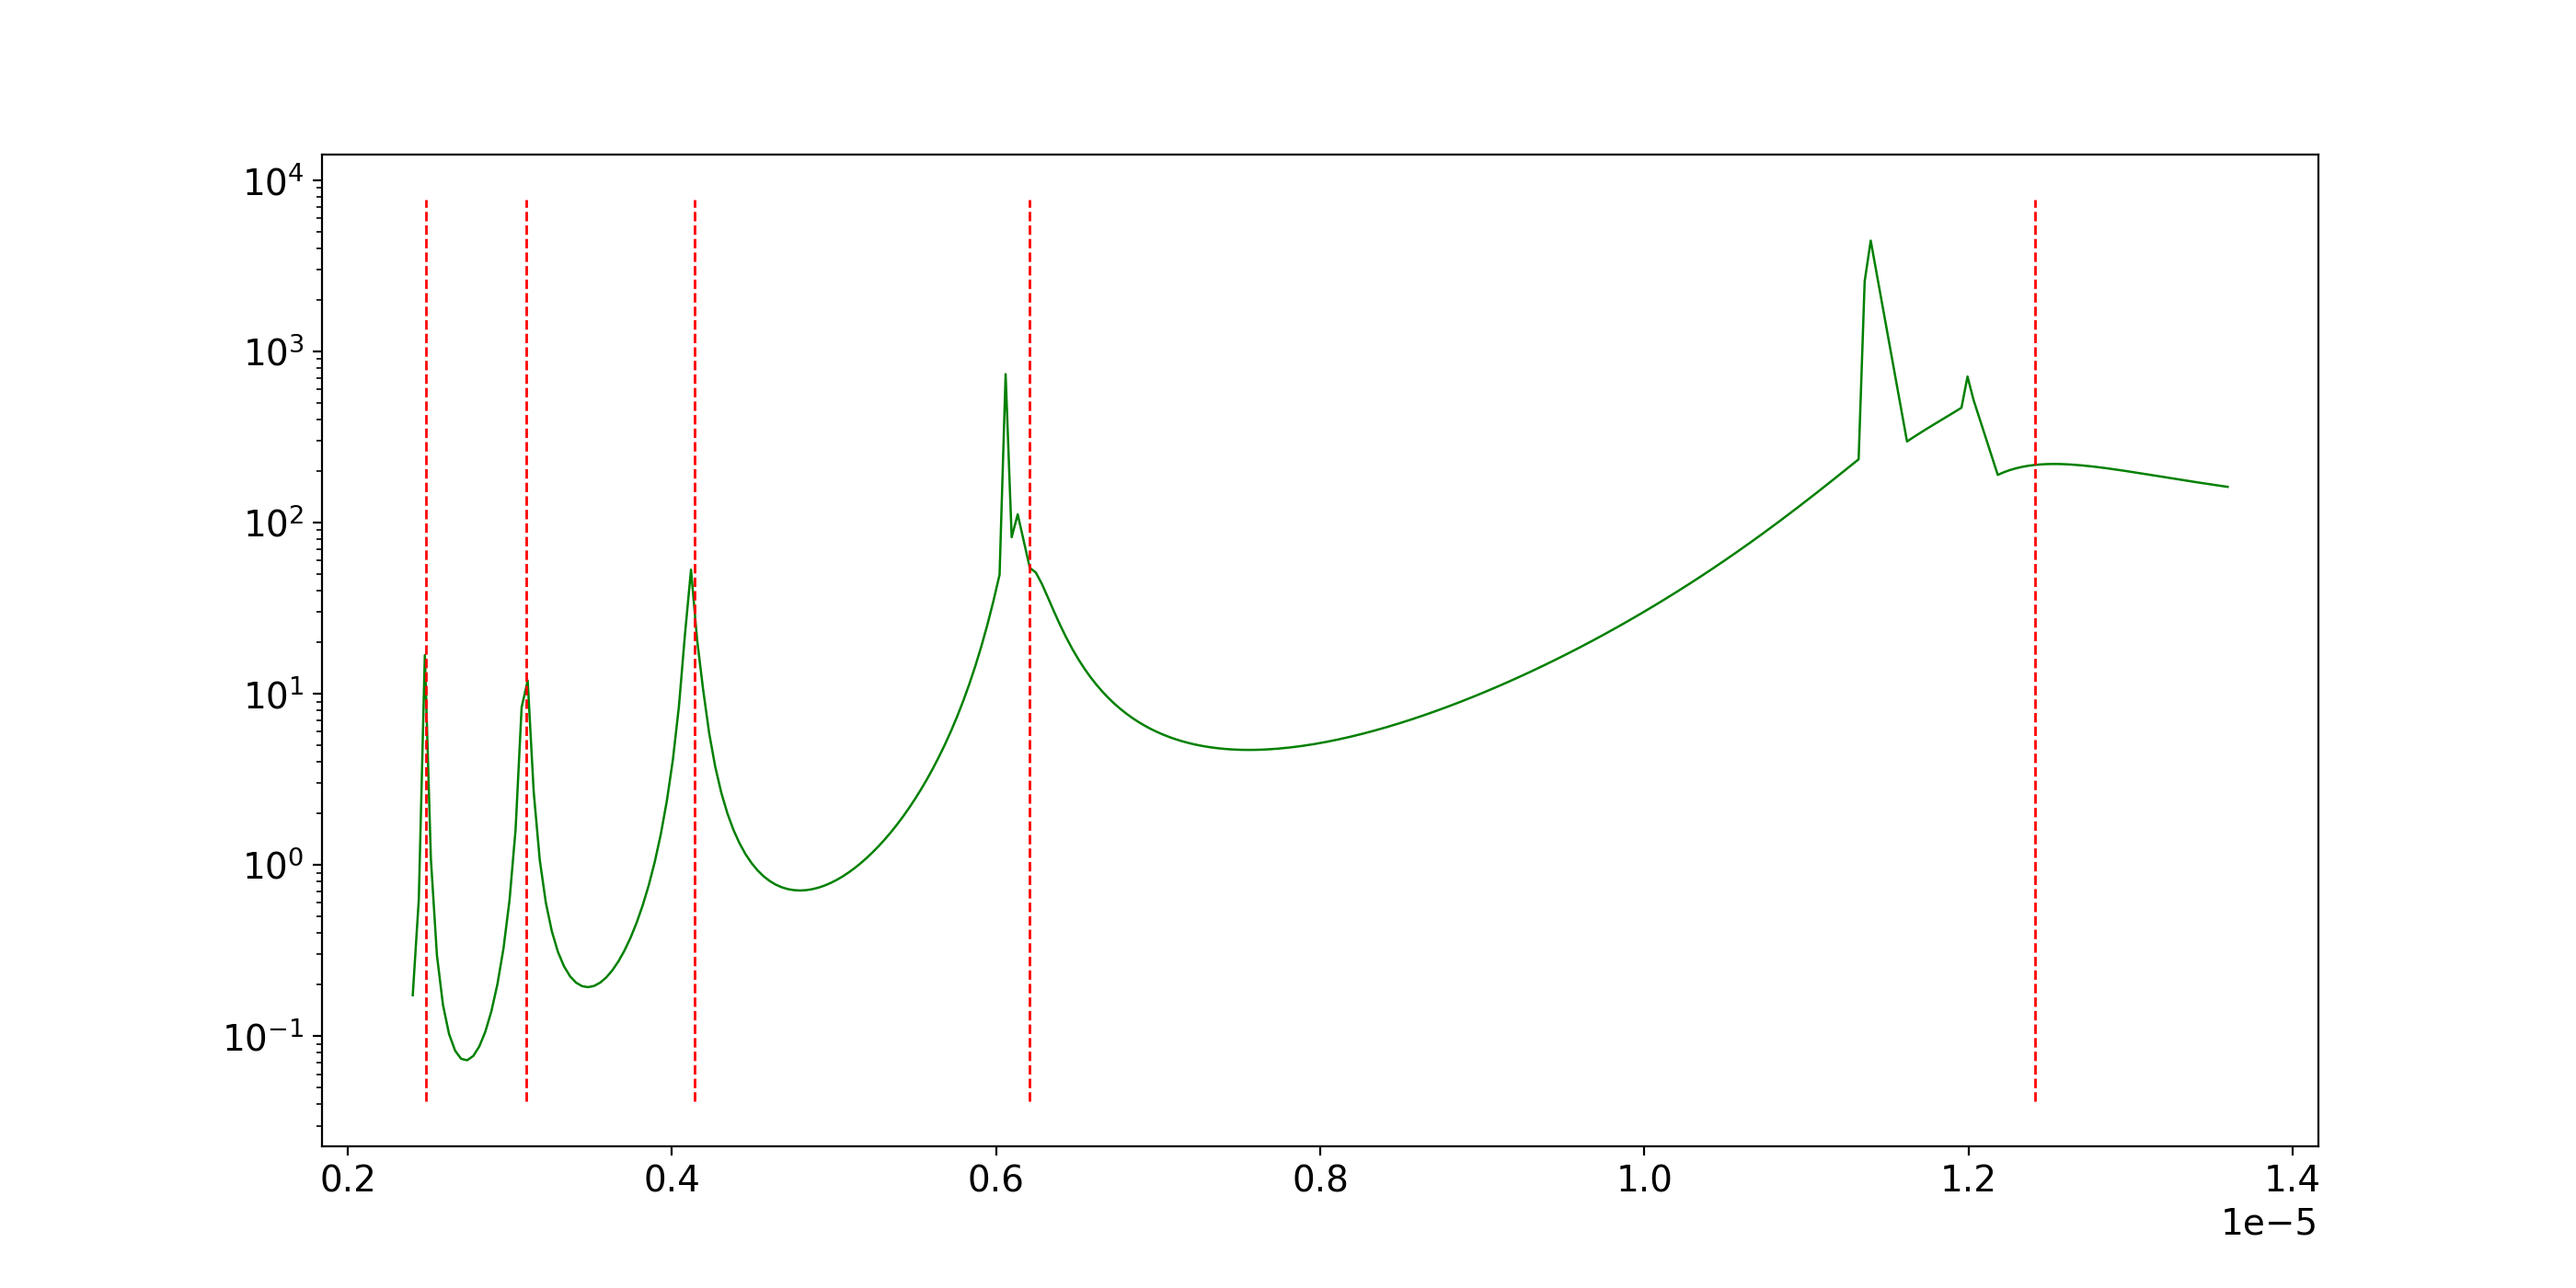

In [17]:
%matplotlib notebook
plt.figure(figsize=(14,7))

CL2 = -20 * betas2.imag/A.scale / np.log(10)
msk = np.where(CL2>0)
plt.plot(wls[msk], CL2[msk], color='green', linewidth=.9)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')


Save data for pgfplots

In [18]:
import os
paper_path = os.path.relpath(os.path.expanduser('~/papers/outer_materials/\
figures/data/bragg/8tube'))

both = np.column_stack((wls[msk]*1e6, CL2[msk]))
np.savetxt(paper_path + '/analytic.dat', both, fmt='%.8f')